### Ensemble Learning

Agora que já vimos algumas técnicas básicas de machine learning, podemos explorar a melhor forma atualmente de alavancar o desempenho destes modelos: o ensemble learning. Esta técnica consiste em utilizar múltiplos algoritmos para resolver o problema, agrupando e ponderando suas previsões. Um exemplo direto é a _Random Forest_, um algoritmo que consiste de múltiplas árvores de decisão construídas com **amostras diferentes** das linhas e colunas do dataset.

Existem 3 macro-categorias de _ensemble learning_, que são:
- Bagging, onde os modelos individuais rodam "em paralelo"
- Boosting, onde cada modelo individual tenta consertar o erro do anterior, executando "em série"
- Stacking, onde usamos a saída de um modelo como variável explicativa para outro

De forma geral, técnicas deste tipo tentam mitigar as fraquezas dos modelos individuais e costumam ter ótimo poder preditivo e flexibilidade. Algoritmos de _boosting_ especificamente são os mais utilizados na indústria como um todo devido à facilidade de implantação, treino rápido, ótimo poder preditivo e ferramentas para controlar o _overfitting_.

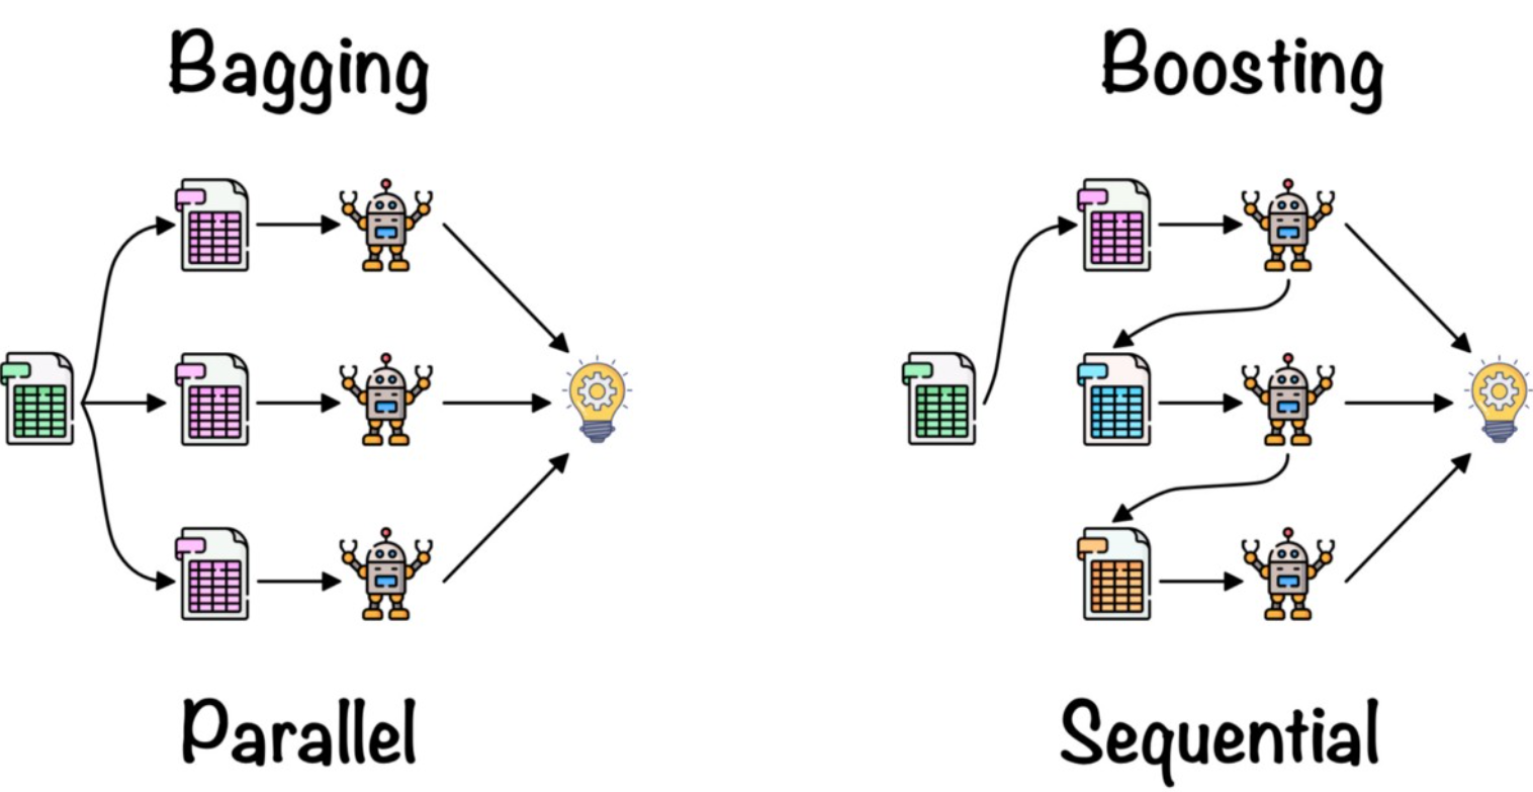

As árvores de decisão são os algoritmos individuais mais tradicionalmente usados para ensemble learning. Vamos ver exemplos destas categorias:

#### Bagging

Nas técnicas de _bagging_, treinaremos vários modelos independentes entre si e usaremos as previsões individuais para fazer uma previsão final. Vamos ver como funciona a _Random Forest_:
<br>
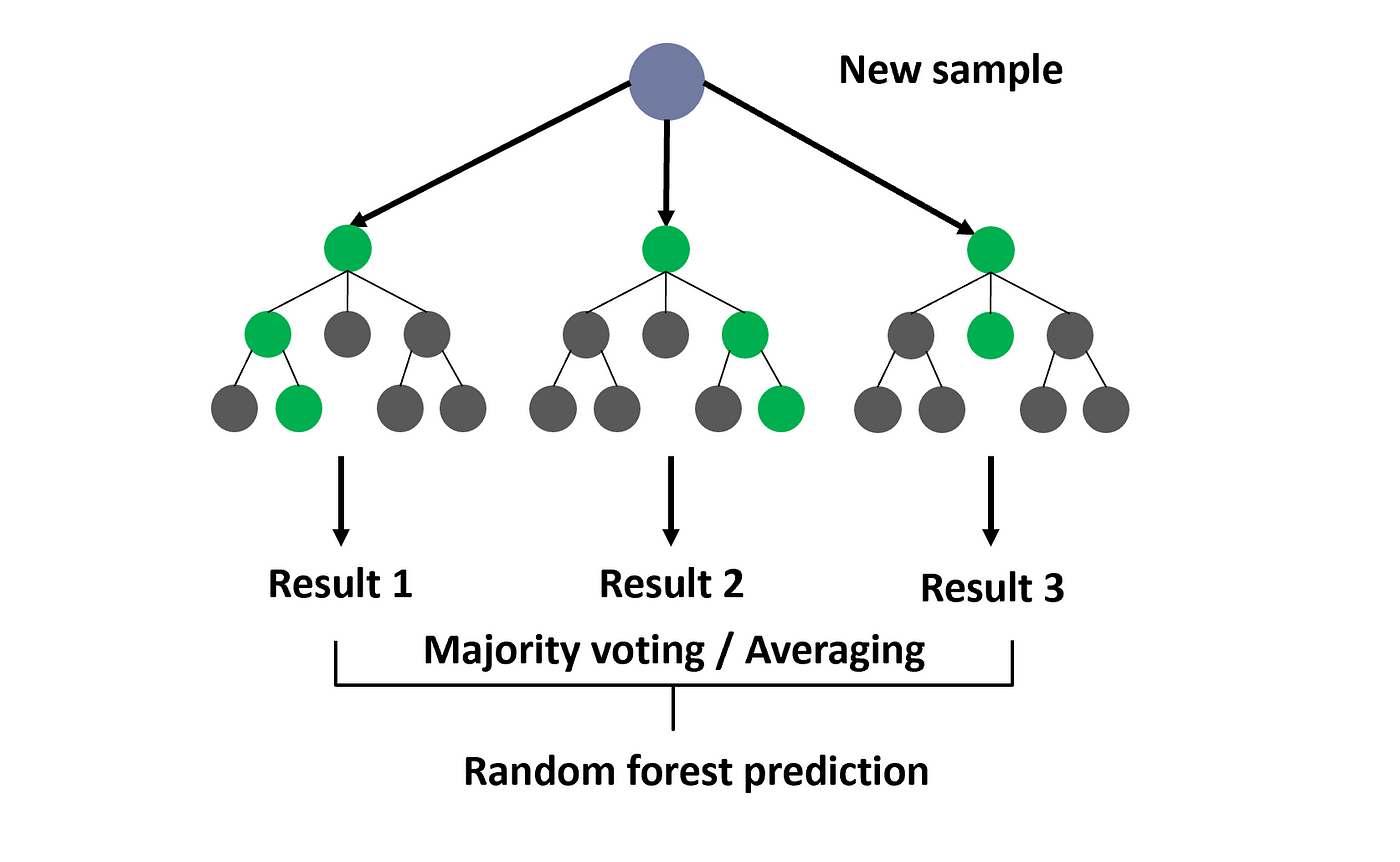

A previsão final é definida como a _moda_ das previsões de cada árvore (voto majoritário) para problemas de classificação e como a _média_ das previsões para problemas de regressão.




Uma pergunta: por quê precisamos _amostrar_ as colunas e linhas do dataset para cada árvore? O que acontece se usarmos as mesmas colunas e amostras para construir todas as árvores da _Random Forest_?

Uma das principais vantagens de uma _random forest_ no lugar de uma árvore de decisão é sua flexibilidade para lidar com overfitting. Conforme aumentamos o número de árvores na floresta, a _variância do modelo_ converge para um número fixo - se temos somente 4 árvores, ao adicionarmos mais uma ela terá um "peso" de $20\%$ na previsão. Porém, se tivermos 200 estimadores, uma árvore adicional teria um "peso" de somente $0.5\%$.

Outra grande vantagem é que as árvores são completamente independentes, o que significa que o modelo é paralelizável quase que por definição - basta treinar uma árvore em cada thread do processador. O parâmetro `n_jobs` da implementação do _sklearn_ controla a paralelização.

As random forests também possuem um viés menor que as árvores de decisão, isto é, são modelos **mais flexíveis**. Porém, devido à natureza do algoritmo, as previsões podem ser mais "generalistas" e não capturar detalhes mais finos e específicos do dataset.

As random forests também possuem boa explicabilidade - não tanto quanto uma árvore de decisão pura, mas muitas vezes é o suficiente. Por conta disso, as random forests oferecem uma boa alternativa às árvores puras com melhor poder preditivo, mais robustez quanto ao overfitting e sem perder muitas propriedades úteis. Na prática, em quase todo problema onde uma árvore de decisão é adequada uma random forest teria um desempenho melhor.

#### Boosting

Já nas técnicas de _boosting_, estamos interessados em construir modelos com o mínimo possível de viés, isto é, a maior flexibilidade e poder preditivo possível. Acabamos "pagando o preço" em variância - os modelos de boosting possuem os maiores poderes preditivos no geral, mas também têm a maior capacidade de overfitting.

O _boosting_ consiste em treinar um modelo qualquer com **pouco poder preditivo**, comumente chamado de _weak learner_, como por exemplo uma árvore de decisão com profundidade 2. Nesse contexto, estas árvores "curtas" são chamadas de _stumps_. Após o ajuste desse modelo, vamos ajustar outro _em sequência_ **dando mais peso pras previsões que o primeiro modelo errou**.
<br>

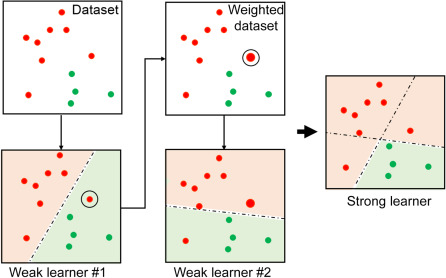

Os algoritmos de boosting são um pouco mais abstratos do que os de bagging, e existem diversas formas de construí-los utilizando critérios diferentes para ponderar os erros. Na aula de hoje exploraremos um dos jeitos mais utilizados e mais robustos, que é o _Light Gradient Boosting Model_, ou LightGBM, um algoritmo desenvolvido e disponibilizado pela Microsoft.

O LightGBM possui ótima escalabilidade, execução rápida, alta eficiência de memória e capacidade de lidar com volumes grandes de dados com relações complexas.

#### Stacking

As técnicas de _stacking_ consistem em treinar múltiplos modelos diferentes e juntá-los de forma que a saída de um modelo é uma variável explicativa para outro. É possível mesclar modelos independentes em paralelo e usar múltiplos outputs como input de um meta-modelo final.

Essa exige bom conhecimento das técnicas mais básicas para alavancar as fortalezas de cada algoritmo. Também é um paradigma muito mais trabalhoso, pois precisamos de múltiplos conjuntos de teste _independentes_ (um pra cada submodelo) de forma a evitar vazamento de informação.

Estas técnicas são menos discutidas pois representam um arcabouço teórico muito generalista, dado a flexibilidade de "conexão" dos modelos. A manutenção de modelos de stacking também é bem mais complicada, necessitando de acompanhamento de desempenho e distribuições de cada modelo individual a fim de evitar desvios de conceito que podem ser propagados ao longo do sistema.

Modelos de _stacking_ são menos utilizados na indústria devido à sua alta complexidade tanto de construção quanto de manutenção, pois o ganho de desempenho costuma ser marginal em comparação com técnicas de boosting. Entretanto, modelos deste tipo rotineiramente atingem máximos de desempenho, sendo "campeões" em diversas competições em plataformas como o Kaggle.

Também podem ser vistos como uma forma de "quebrar" o problema em sub-problemas mais fáceis de serem resolvidos, treinando modelos "especialistas" em cada pedaço do problema. De certa forma, podemos ver etapas de um modelo de stacking como reduções de dimensionalidade.

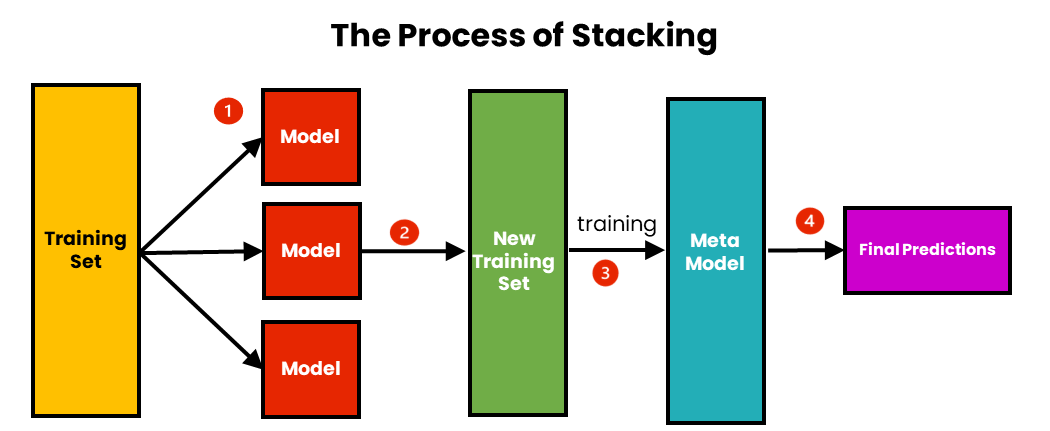

### Uma analogia

Focaremos nos modelos de bagging e boosting devido à natureza livre e genérica dos modelos de stacking. Vamos construir uma analogia entre estes para fortalecer a intuição:

Imagine que você precisa resolver um problema de física bem difícil e específico, como por exemplo, prever a diferença de potencial elétrico de um relâmpago. Suponha também que você tem vários amigos físicos dispostos a ajudar nesse problema.

No cenário das técnicas de _bagging_, cada um dos seus amigos resolve o problema inteiro, e a resposta final é uma média da resposta de cada um dos amigos.
Já no cenário dos modelos de _boosting_, cada amigo tenta resolver o problema de forma sequencial, um após o outro, e um amigo sempre vai focar em corrigir os erros que o amigo anterior cometeu.

No bagging, incluir novos amigos ajuda a ter mais certeza da previsão, mas só até certo ponto. No caso do boosting, a inclusão de novos amigos pode mudar bastante as previsões em qualquer momento através das tentativas de correção de erros, o que significa que eles podem tentar modelar o **ruído** do conjunto de dados - overfitting.

## Exemplos
#### Bagging - Random Forest
Vamos utilizar o dataset _CDC Diabetes Health Indicators_ para esta aula. Este conjunto de dados possui atributos de saúde de seres humanos e uma marcação da presença de diabetes (ou pré-diabetes). O objetivo é classificar as amostras entre as duas classes, saudável e doente.

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import time
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
df = pd.concat([cdc_diabetes_health_indicators.data.features, cdc_diabetes_health_indicators.data.targets], axis=1)
# df = pd.read_csv('diabetes_dataset.csv')

In [2]:
# Verificando nulos
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [3]:
# Verificando duplicidade
df.duplicated().sum()

24206

In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1312)
model_cols = [c for c in df.columns if c!='Diabetes_binary']

Agora que temos o dataset preparado, vamos ajustar algumas _random forests_ sobre os dados. É muito importante estarmos atentos aos hiperparâmetros do modelo e explorá-los afim de chegar no melhor desempenho.

Nesta primeira versão, limitaremos o modelo a 10 estimadores de profundidade máxima 10, com pesos das classes ponderados pela sua frequência inversa e 10 amostras mínimas para fazer uma quebra.

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators=10,
                             max_depth=10,
                             class_weight='balanced',
                             min_samples_split=10,
                             n_jobs=-1)

rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=10, n_jobs=-1)

In [7]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.8278133333937159
ROC-AUC teste: 0.8062622494532989


Tivemos um desempenho muito bom do modelo de uma forma geral dado as características do problema. Entretanto, temos um leve indício de overfitting devido ao desempenho melhor no conjunto de treino.
Vamos agora variar os hiperparâmetros e observar como as métricas de desempenho variam.

In [8]:
# Profundidade máxima 5
rfr = RandomForestClassifier(n_estimators=10,
                             max_depth=5,
                             class_weight='balanced',
                             min_samples_split=10,
                             n_jobs=-1)
rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.8001753474900497
ROC-AUC teste: 0.7961107509168825


In [9]:
# Sem profundidade máxima e mínimo de amostras
rfr = RandomForestClassifier(n_estimators=10,
                             max_depth=None,
                             class_weight='balanced',
                             n_jobs=-1)
rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.9980971356168454
ROC-AUC teste: 0.7313155237550281


In [10]:
# Com 50 árvores
rfr = RandomForestClassifier(n_estimators=50,
                             max_depth=10,
                             class_weight='balanced',
                             n_jobs=-1)
rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.8321974738130604
ROC-AUC teste: 0.8095844453775578


In [11]:
# Com 50 árvores, sem profundidade máxima e sem qtd mínima de amostras
rfr = RandomForestClassifier(n_estimators=50,
                             max_depth=None,
                             class_weight='balanced',
                             n_jobs=-1)
rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.9994989315791721
ROC-AUC teste: 0.7710866976848684


In [12]:
# Com 50 árvores, sem profundidade máxima e 20 amostras para uma quebra
rfr = RandomForestClassifier(n_estimators=50,
                             max_depth=None,
                             class_weight='balanced',
                             min_samples_split=20,
                             n_jobs=-1)
rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.9363108183227057
ROC-AUC teste: 0.8036212681284154


In [13]:
# Com 200 árvores, profundidade máxima alta e mínimo de 10 amostras para quebra
rfr = RandomForestClassifier(n_estimators=200,
                             max_depth=20,
                             class_weight='balanced',
                             min_samples_split=10,
                             n_jobs=-1)
rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.9519307215088892
ROC-AUC teste: 0.803375730470947


In [14]:
# Com 1000 árvores sem profundidade máxima
rfr = RandomForestClassifier(n_estimators=1000,
                             max_depth=None,
                             class_weight='balanced',
                             min_samples_split=10,
                             n_jobs=-1)
rfr.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], rfr.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], rfr.predict_proba(df_test[model_cols])[:,1]))

ROC-AUC treino: 0.9799395155784328
ROC-AUC teste: 0.8017500205288065


Note que quando aumentamos a quantidade de árvores, a diferença de desempenho entre treino e teste tende a diminuir.

Exercício/desafio: utilizando random forests neste dataset, treine um modelo com pelo menos 0.81 de ROC-AUC.

#### Boosting - LightGBM

Instalando a lib:

In [15]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, class_weight='balanced')
lgbm.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], lgbm.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], lgbm.predict_proba(df_test[model_cols])[:,1]))

[LightGBM] [Info] Number of positive: 24571, number of negative: 136060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 160631, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC-AUC treino: 0.8287108669226666
ROC-AUC teste: 0.8133833554934972


De cara já temos um desempenho melhor que random forest! Isto se dá ao ótimo poder preditivo do LightGBM devido a sua alta flexibilidade e facilidade de construir padrões. Vamos variar os hiperparâmetros e observar o que acontece com as métricas:

In [17]:
# Com 10 estimadores
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=10, learning_rate=0.1, class_weight='balanced')
lgbm.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], lgbm.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], lgbm.predict_proba(df_test[model_cols])[:,1]))

[LightGBM] [Info] Number of positive: 24571, number of negative: 136060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 160631, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC-AUC treino: 0.8082862453286519
ROC-AUC teste: 0.8020638433683936


In [18]:
# Com 300 estimadores
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.1, class_weight='balanced')
lgbm.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], lgbm.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], lgbm.predict_proba(df_test[model_cols])[:,1]))

[LightGBM] [Info] Number of positive: 24571, number of negative: 136060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 160631, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC-AUC treino: 0.8462032107597268
ROC-AUC teste: 0.811326068994821


Observe que quando aumentamos o número de árvores, tivemos uma melhoria significativa no desempenho no conjunto de treino. Entretanto, o desempenho no conjunto de teste _diminuiu_, o que nos indica a presença de overfitting.

Dessa forma, podemos concluir que aumentar a quantidade de estimadores em técnicas de _bagging_ induz uma convergência da variância do modelo, enquanto um aumento de estimadores em um modelo de _boosting_ causa um **aumento** de variância e consequente overfitting.

Vamos manipular um pouco mais os hiperparâmetros:

In [19]:
# Com 300 estimadores
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.01, class_weight='balanced')
lgbm.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], lgbm.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], lgbm.predict_proba(df_test[model_cols])[:,1]))

[LightGBM] [Info] Number of positive: 24571, number of negative: 136060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 160631, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC-AUC treino: 0.8192211194307457
ROC-AUC teste: 0.811125618471128


Conseguimos diminuir o gap entre métricas de treino e teste diminuindo a `learning_rate`! Este parâmetro representa um "peso do peso", isto é, quão forte é a influência de erros anteriores nos próximos estimadores sendo construídos. Diminuir este parâmetro faz com o que o modelo aprenda mais devagar, porém consiga capturar relações mais sutis.

Este hiperparâmetro também está presente em redes neurais e é crucial ajustá-lo corretamente para garantir o aprendizado. Infelizmente, não existe uma técnica "mestra" para determinar a learning rate adequada, sendo necessária experimentação com diferentes valores e avaliação das métricas.

In [20]:
# Com 100 estimadores e lr=0.5
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.05, class_weight='balanced')
lgbm.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], lgbm.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], lgbm.predict_proba(df_test[model_cols])[:,1]))

[LightGBM] [Info] Number of positive: 24571, number of negative: 136060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 160631, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC-AUC treino: 0.8229599284294714
ROC-AUC teste: 0.8131633251002091


In [21]:
# Com 300 estimadores
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=500, learning_rate=0.01, class_weight='balanced')
lgbm.fit(df_train[model_cols], df_train['Diabetes_binary'])
from sklearn.metrics import roc_auc_score
print('ROC-AUC treino:', roc_auc_score(df_train['Diabetes_binary'], lgbm.predict_proba(df_train[model_cols])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], lgbm.predict_proba(df_test[model_cols])[:,1]))

[LightGBM] [Info] Number of positive: 24571, number of negative: 136060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 160631, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC-AUC treino: 0.8228727566840306
ROC-AUC teste: 0.8130854120763977


É importante notar que a diferença de 0.01 na ROC-AUC entre a Random Forest e o LightGBM _pode_ ser muito significativa dependendo da necessidade de negócio. Se essa diferença de desempenho se traduzir em 1% a mais de receita para uma operação de margem apertada, por exemplo, será extremamente relevante obter o máximo de desempenho do modelo.

Entretanto, se essa diferença não impactar de forma significativa os negócios, é necessário ponderar se vale a pena a complexidade extra do LightGBM (perda de explicabilidade, treino mais difícil e demorado, difícil rastreabilidade) em detrimento da simplicidade e transparência da Random Forest.

#### Stacking
Vamos agora construir um exemplo de modelo de stacking. Para esta finalidade, vamos utilizar a Random Forest _dentro_ do LightGBM: vamos pegar o _score_ de cada previsão da RandomForest e usá-la como variável explicativa para o LightGBM.

In [22]:
# Separando treino em 2 datasets
df_train_rfr, df_train_lgbm = train_test_split(df_train, test_size=0.5, random_state=1312)

# Random Forest
rfr = RandomForestClassifier(n_estimators=10,
                             max_depth=10,
                             class_weight='balanced',
                             min_samples_split=10,
                             n_jobs=-1)
rfr.fit(df_train_rfr[model_cols], df_train_rfr['Diabetes_binary'])

# LGBM
model_cols_lgbm = model_cols + ['score_rfr']
# Construindo coluna de score random forest
df_train_lgbm['score_rfr'] = rfr.predict_proba(df_train_lgbm[model_cols])[:,1]
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, class_weight='balanced')
lgbm.fit(df_train_lgbm[model_cols_lgbm], df_train_lgbm['Diabetes_binary'])
df_test['score_rfr'] = rfr.predict_proba(df_test[model_cols])[:,1]
print('ROC-AUC treino:', roc_auc_score(df_train_lgbm['Diabetes_binary'], lgbm.predict_proba(df_train_lgbm[model_cols_lgbm])[:,1]))
print('ROC-AUC teste:', roc_auc_score(df_test['Diabetes_binary'], lgbm.predict_proba(df_test[model_cols_lgbm])[:,1]))

[LightGBM] [Info] Number of positive: 12462, number of negative: 67854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 80316, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
ROC-AUC treino: 0.8378099835856947
ROC-AUC teste: 0.8105053997513918


## Exercícios
- A maior parte das implementaçõs do sklearn (e similares) possui métricas de importância de cada variável após o ajuste do modelo. Estas métricas são definidas de formas diferentes de acordo com a técnica utilizada - no caso das árvores e ensembles de árvores, utilizamos o ganho médio de informação (Gini ou entropia) daquela variável ao longo do modelo todo. Construa um DataFrame com os nomes das variáveis e sua respectiva importância para a melhor RandomForest ajustada e o melhor LightGBM, e compare ambos. Utilize a documentação das ferramentas para se guiar (LightGBM: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html).
- Procure o algoritmo de boosting XGBoost, instale sua biblioteca e ajuste-o sobre este mesmo dataset. Varie seus hiperparâmetros para obter um modelo robusto e sem overfitting. Compare o que acontece quando aumentamos os estimadores do XGBoost e do LightGBM, além de suas métricas de desempenho e tempo computacional para treino. Dica: utilize o decorator `%%time` na primeira linha da célula para verificar o tempo de execução.

In [23]:
%%time
time.sleep(1)

CPU times: total: 391 ms
Wall time: 1 s
